Import the Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read the dataset

In [23]:
df = pd.read_csv('weight_height.csv')
df.head()

,Weight,Height
0,79,137
1,98,179
2,93,172
3,91,158
4,94,162


Plot the datatset 

Text(0, 0.5, 'Height')

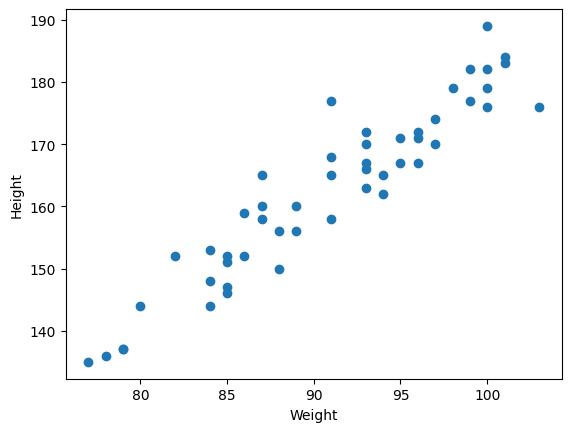

In [24]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

Divide the dataframe into independent features and dependent features

In [38]:
X = df[['Weight']] #independent feature
y = df['Height'] # Dependent feature

Train Test split the datatset

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 1), (10, 1), (40,), (10,))

Standardise the datatset
Train the independent data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

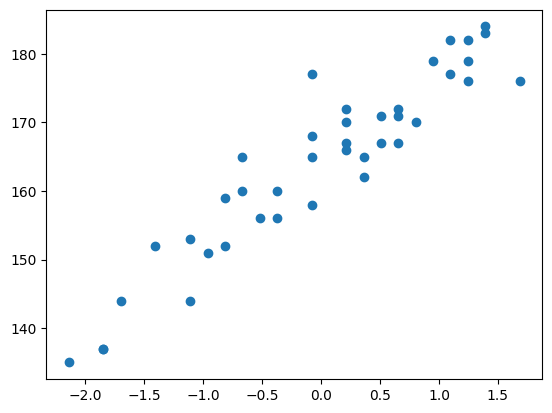

In [43]:
plt.scatter(X_train,y_train)

Train the model

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
print("The slope or coefficient of weight is : ", regressor.coef_)
print("The Intercept is : ",regressor.intercept_)

The slope or coefficient of weight is :  [12.17894382]
The Intercept is :  164.175


Plot the best fit line

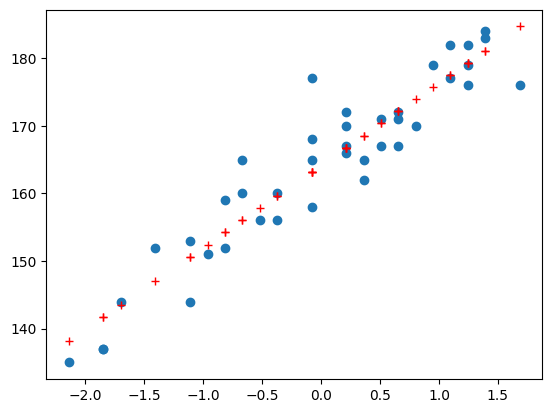

In [51]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r+')

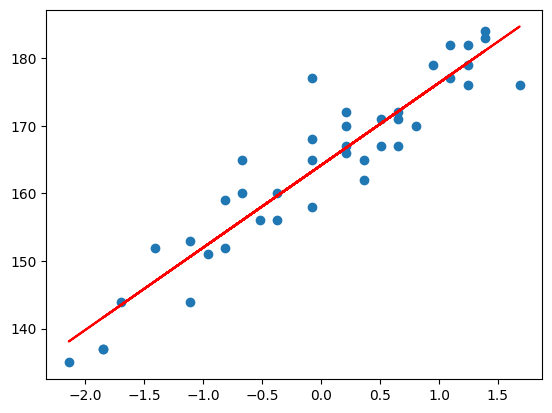

In [53]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

# Prediction of the Trained data
1) Predicted height output = Intercept + coefficient(weights)
2) y_predicted_train = 164.175 + (12.17894382)(X_train)

# Prediction of the Test data
1) Predicted height output = Intercept + coefficient(weights)
2) y_predicted_test = 164.175 + (12.17894382)(X_test)

In [54]:
y_predict_test = regressor.predict(X_test)
y_predict_test, y_test

(array([156.02210617, 152.43841658, 166.77317496, 152.43841658,
        179.31608853, 157.81395097, 152.43841658, 173.94055414,
        139.895503  , 150.64657178]),
 13    158
 39    146
 30    163
 45    147
 17    189
 48    150
 26    152
 25    174
 32    136
 19    148
 Name: Height, dtype: int64)

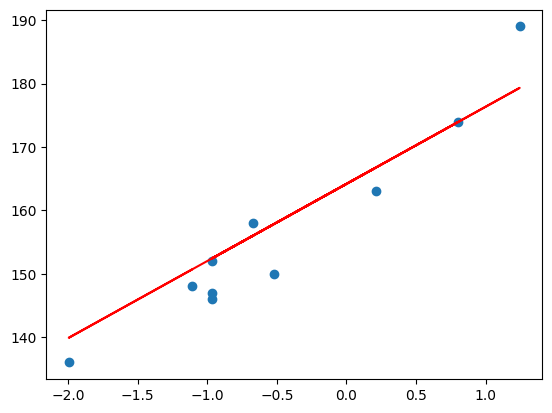

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

Performance Metrics

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_predict_test)
mae = mean_absolute_error(y_test, y_predict_test)
rmse = np.sqrt(mse)
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)


MSE :  26.638949605893423
MAE :  4.2165701607229895
RMSE :  5.161293404360328


In [ ]:
# RSquare :
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict_test)
score


0.8767913158230729

In [61]:
# Adjsuted RSquare
1 - (1 - score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)

0.8613902303009571

In [64]:
#Predicted Weight
scaled_weight = scaler.transform([[92]])
scaled_weight

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.0662069]])

In [70]:
print("The Height prediction for weight of 92Kg is : " ,regressor.predict(scaled_weight[[0]]))

The Height prediction for weight of 92Kg is :  [164.98133016]


Assumption

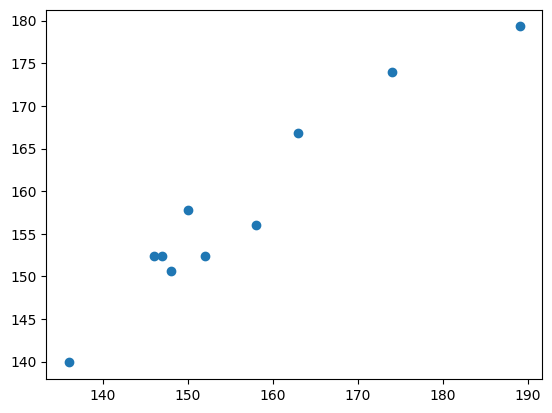

In [71]:
plt.scatter(y_test, y_predict_test)

In [72]:
residuals = y_test - y_predict_test
residuals


13    1.977894
39   -6.438417
30   -3.773175
45   -5.438417
17    9.683911
48   -7.813951
26   -0.438417
25    0.059446
32   -3.895503
19   -2.646572
Name: Height, dtype: float64

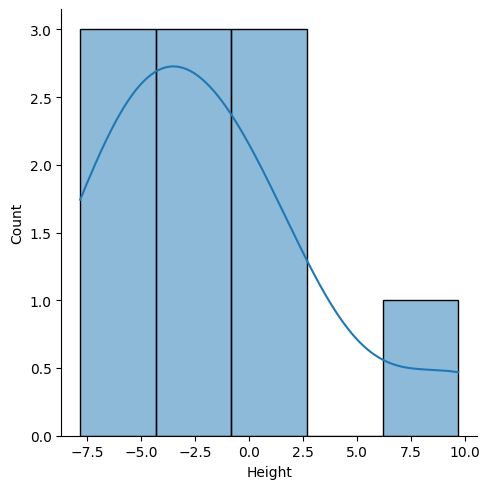

In [74]:
import seaborn as sns
sns.displot(residuals, kde=True)